# Chords

## Vertical Sonorities
Our plan for today:

- Check in on the first project.
- Talk about how to analyze vertical sonorities (chords, interval vectors, )_etc._) 


I'm just going to set up install music21 and musescore before I forget...

In [ ]:
#@title Setting up music21 in the background. { form-width: "30%" }
# !pip install --upgrade music21
#!add-apt-repository ppa:mscore-ubuntu/mscore-stable -y
# !apt-get update
!apt-get install musescore
!apt-get install xvfb
import os
os.putenv('DISPLAY', ':99.0')
!start-stop-daemon --start --pidfile /var/run/xvfb.pid --make-pidfile --background --exec /usr/bin/Xvfb -- :99 -screen 0 1024x768x24 -ac +extension GLX +render -noreset
from music21 import *
us = environment.UserSettings()
us['musescoreDirectPNGPath'] = '/usr/bin/mscore'
us['directoryScratch'] = '/tmp'
!sh -e /etc/init.d/x11-common start


### How Humdrum Looks at Harmony

- The ```hint``` tool
- The ```iv``` tool (interval vector)
- ```tntype``` from the Humdrum Extras Toolkit
- ```sonority``` from the Humdrum Extras Toolkit

These all work quite well. 

You can also just parse the kern files in Python, if they're separated consistently. For example, you could parse it as: 
```
for each line:
    for each column in that line:
      process something. 
```

But you would have to write all of the things to parse out what it means to be a triad, interval vectors, _etc._ 

Thankfully, people have already done that for us.



### How music21 Looks at Harmony

- The ```intervalVector()``` tool.
- The ```chord.Chord``` function.
- ```commonName```
- ```pitchedCommonName```
- ```forteClass```
- ```primeForm```
- Others.

It requires a bit more time to parse the files (you can use the ```chordify``` function to reduce), but it has a bit more functionality, overall.


For eaxample, you can get:


In [ ]:
### the common name (quality) of a chord.
from music21 import *
cMinor = chord.Chord(["C4","G4","E-5"])

In [ ]:
###the common name function.
cMinor.commonName


'minor triad'

In [ ]:
###pitch and quality
c1 = chord.Chord(['c', 'e-', 'g'])
c1.pitchedCommonName


'C-minor triad'

In [ ]:
###it can find some obscure ones
c3 = chord.Chord(['c', 'd-', 'e', 'f#'])
c3.commonName

'all-interval tetrachord'

In [ ]:
### but if it doesn't exist, it just gives the Forte class.
c3 = chord.Chord([0, 1, 2, 3, 4, 9])
c3.commonName


'forte class 6-36B'

In [ ]:
### and find dominant chords.
c4a = chord.Chord(['c', 'e', 'g', 'b-'])
c4a.commonName


'dominant seventh chord'

In [ ]:
### and augmented sixth chords.
c4b = chord.Chord(['c', 'e', 'g', 'a#'])
c4b.commonName


'German augmented sixth chord'

In [ ]:
### forte class.
c1 = chord.Chord(['c', 'e-', 'g'])
c1.forteClass


'3-11A'

In [ ]:
### equivalent of tntype.
c1 = chord.Chord(['c', 'e-', 'g'])

c1.forteClass

'3-11A'

In [ ]:
### tntype without inversion.
c1 = chord.Chord(['c', 'e-', 'g'])
c1.forteClassTnI


'3-11'

In [ ]:
### prime form
c1 = chord.Chord(['c', 'e-', 'g'])
c1.primeForm


[0, 3, 7]

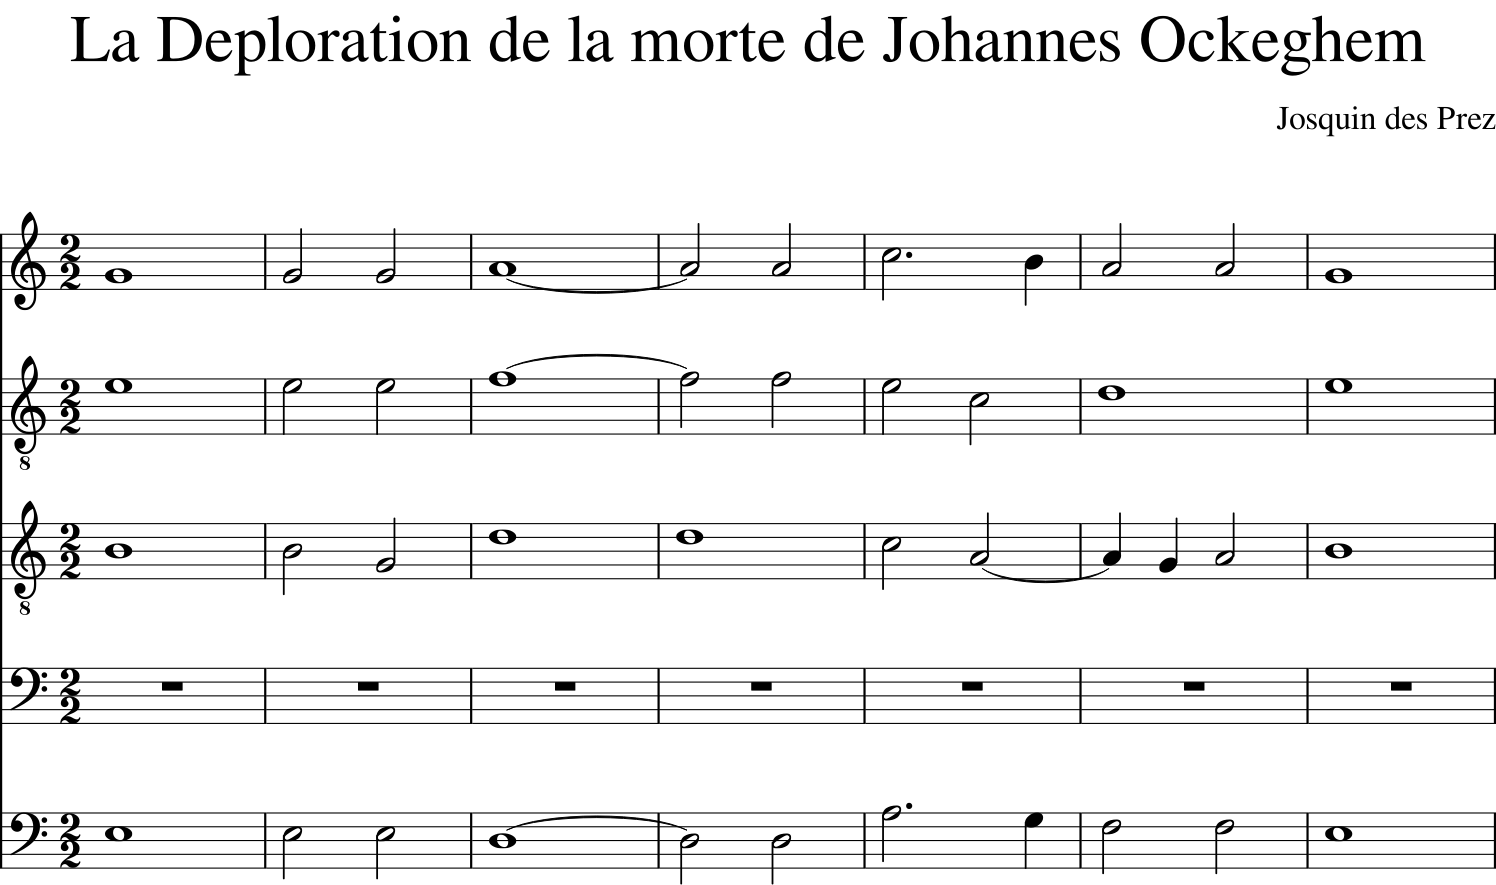

In [ ]:
jos = corpus.parse('josquin/laDeplorationDeLaMorteDeJohannesOckeghem')
mergedScores = jos.mergeScores()
scoreExcerpt = mergedScores.measures(127, 133)
scoreExcerpt.show()

#### Chordify

The ```chordify``` function can reduce the harmony to an object that can be more easily analyzed.

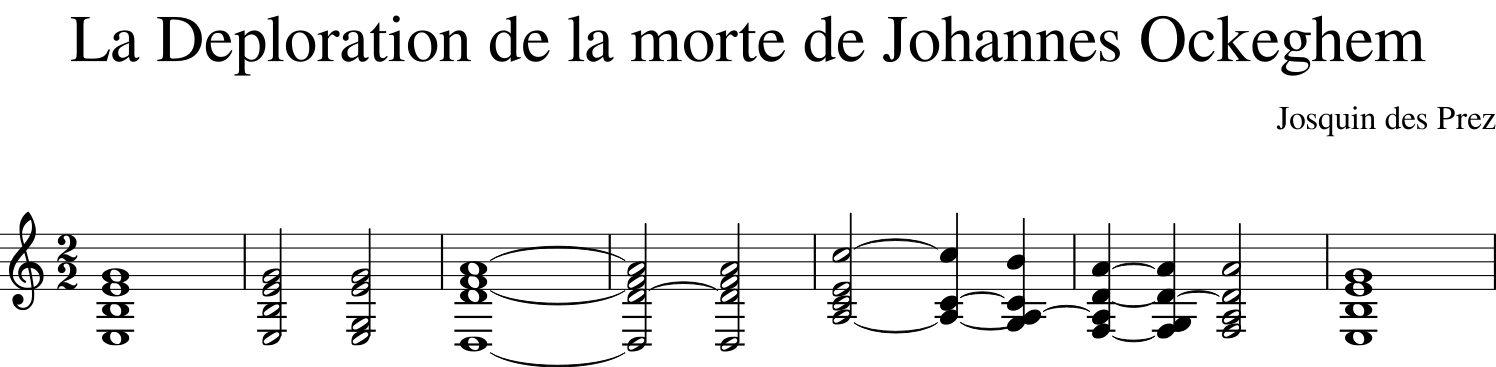

In [ ]:
reduction = scoreExcerpt.chordify()
reduction.show()

##### Annotating with Chordify:

The loop below (from the music21 User Guide) shows how you can annotate the interval of the piece:

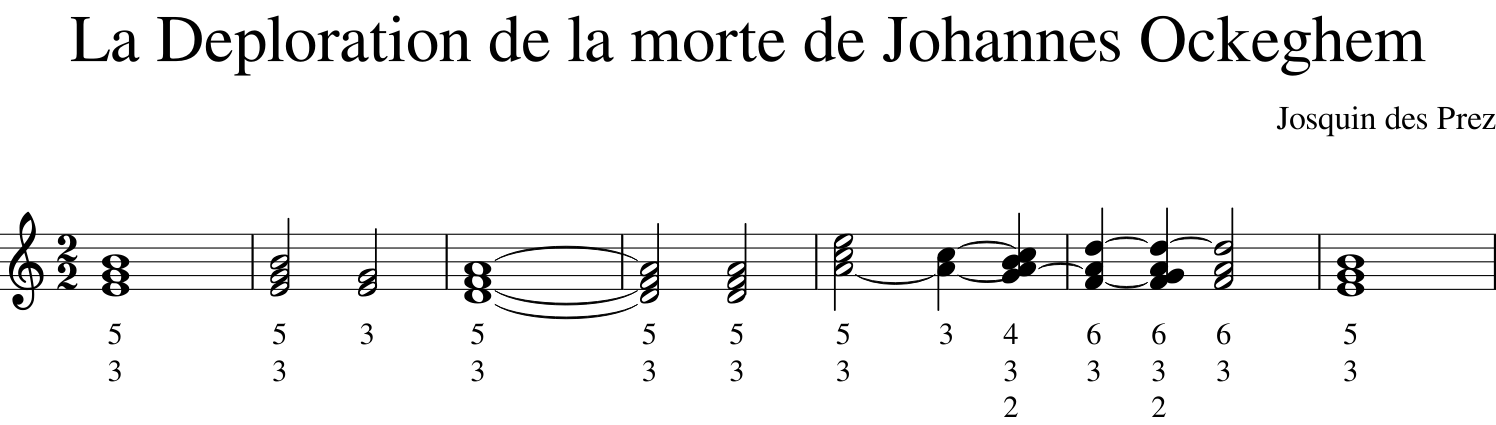

In [ ]:
for c in reduction.recurse().getElementsByClass('Chord'):
    c.closedPosition(forceOctave=4, inPlace=True)
    c.annotateIntervals()
reduction.show()


A similar loop can show all of the labels:


In [ ]:
for i in reduction.recurse().getElementsByClass('Chord'):
  print(i.commonName)

minor triad
minor triad
Minor Third
minor triad
minor triad
minor triad
minor triad
Minor Third
lydian tetrachord
minor triad
perfect-fourth minor tetrachord
minor triad
minor triad


### Roman Numerals

In order to get Roman numerals, you need to give it the key first. In the example below, you can manually input the key and the chord spelling.

In [ ]:
kb = key.Key('C')
f = chord.Chord('F#5 A#5 C#6')
rf = roman.romanNumeralFromChord(f, kb)
rf.figureAndKey

'#IV in C major'

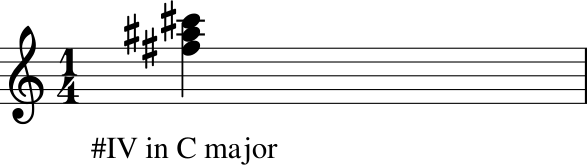

In [ ]:
rf.lyric = rf.figureAndKey
rf.show()

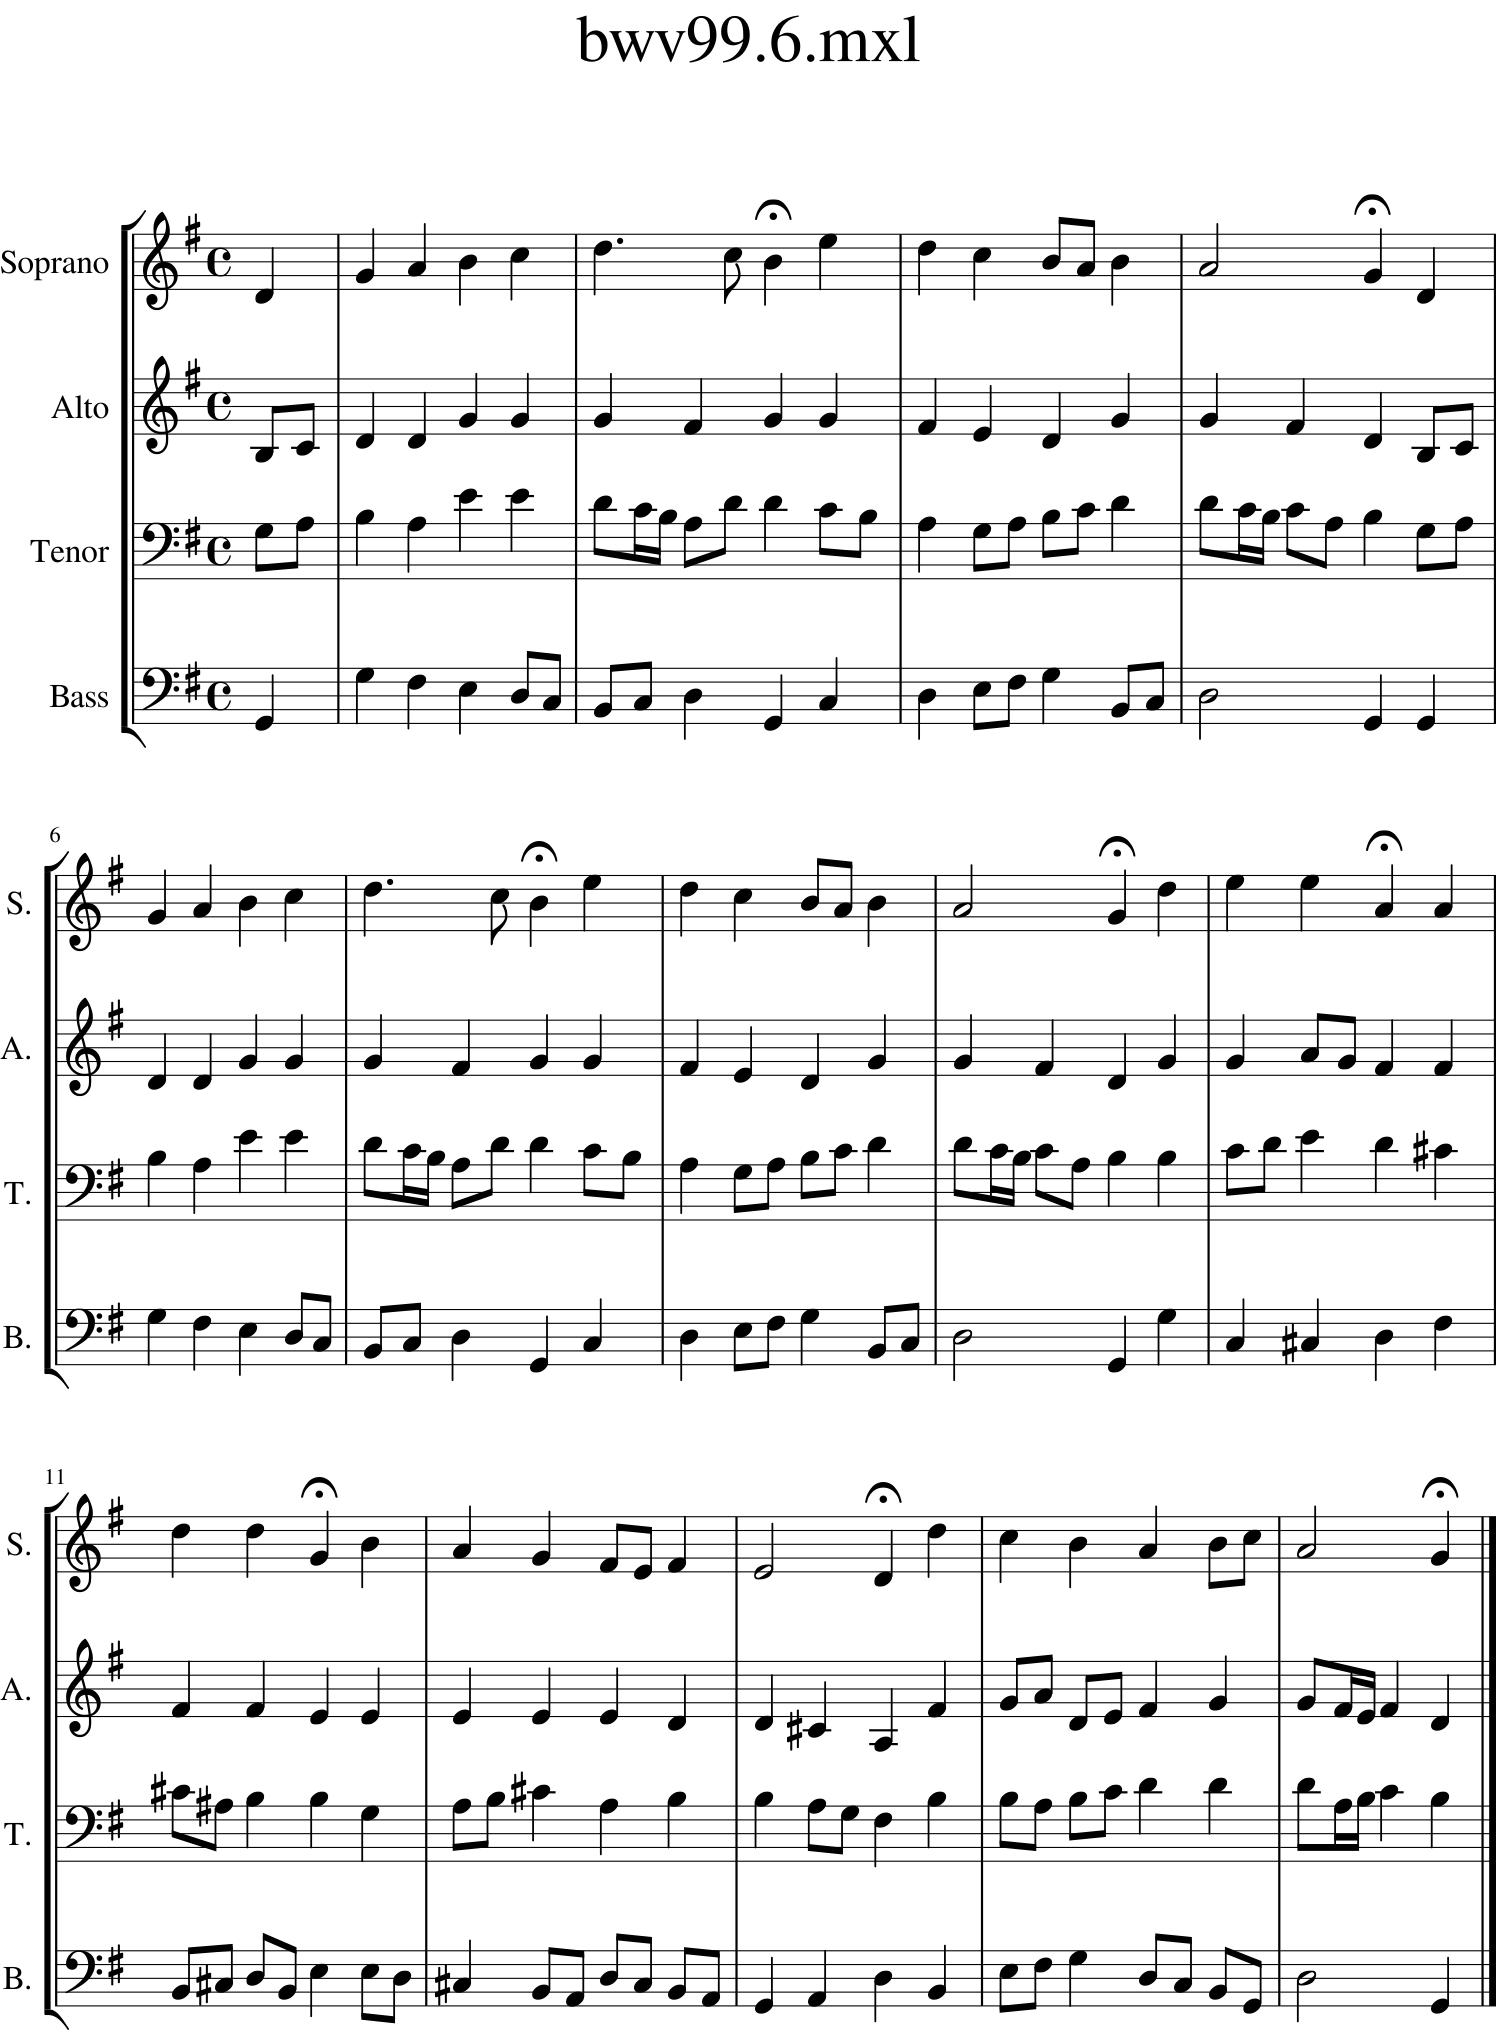

In [ ]:
#### import a piece
bach_chorale = corpus.parse('bach/bwv99')
bach_chorale.show()

### Getting all the chords in a Bach Chorale

The code below can get the chord quality of every chord in a chorale.

In [ ]:
### chordify
reduction = bach_chorale.chordify()
for i in reduction.recurse().getElementsByClass('Chord'):
  print(i.commonName)
### roman numeral analysis

### show 

major triad
quartal tetramirror
major triad
major triad
minor triad
major-second major tetrachord
major triad
major triad
quartal trichord
perfect-fourth major tetrachord
major triad
incomplete dominant-seventh chord
major triad
major triad
major seventh chord
major triad
major triad
half-diminished seventh chord
major triad
quartal tetramirror
major triad
perfect-fourth major tetrachord
quartal trichord
quartal tetramirror
major-second major tetrachord
dominant seventh chord
major triad
major triad
major triad
quartal tetramirror
major triad
major triad
minor triad
major-second major tetrachord
major triad
major triad
quartal trichord
perfect-fourth major tetrachord
major triad
incomplete dominant-seventh chord
major triad
major triad
major seventh chord
major triad
major triad
half-diminished seventh chord
major triad
quartal tetramirror
major triad
perfect-fourth major tetrachord
quartal trichord
quartal tetramirror
major-second major tetrachord
dominant seventh chord
major triad
ma

In [ ]:
import re
### can we get a Roman numeral analysis?

### get the key...
sapp_key = analysis.discrete.SimpleWeights(bach_chorale)
key = sapp_key.getSolution(bach_chorale)

## reduce
reduction = bach_chorale.chordify()
chords = []
tonics = []
dominants = []
## loop over every chord.
for i in reduction.recurse().getElementsByClass('Chord'):
  f = chord.Chord(i)
  rf = roman.romanNumeralFromChord(f, key)
  chords.append(rf.figure)
  roman_figure = str(rf.figure)
  if re.search("^ii$", roman_figure):
    tonics.append(roman_figure)
  elif re.search("^V$", roman_figure):
    dominants.append(roman_figure)

total = len(chords)
dominants = len(dominants)
tonics = len(tonics)
print("Dominants:")
print(dominants/total)

print("Tonics:")
print(tonics/total)


  # print(rf.figure)
  # or print(rf.figureAndKey)

Dominants:
0.10416666666666667
Tonics:
0.0


## Exercise

How might we get all Roman numerals in all Bach Chorales?




In [ ]:
# your code here.
#  Let's set the google drive up so that we can access those polska files...

# step 1: get all of our chorales from the google drive

# step 2: run a loop over all of those chorales.

# step 3: for each chorale, we need the key, and then we need the roman numerals.

# find total amount of chords

# we want to find all tonics and all dominants. 

# if 'V' or 'vii' put into dominant array.

# if I or i put into tonic array. 

# tonic/total

# dominant/total


## Annotating a Score


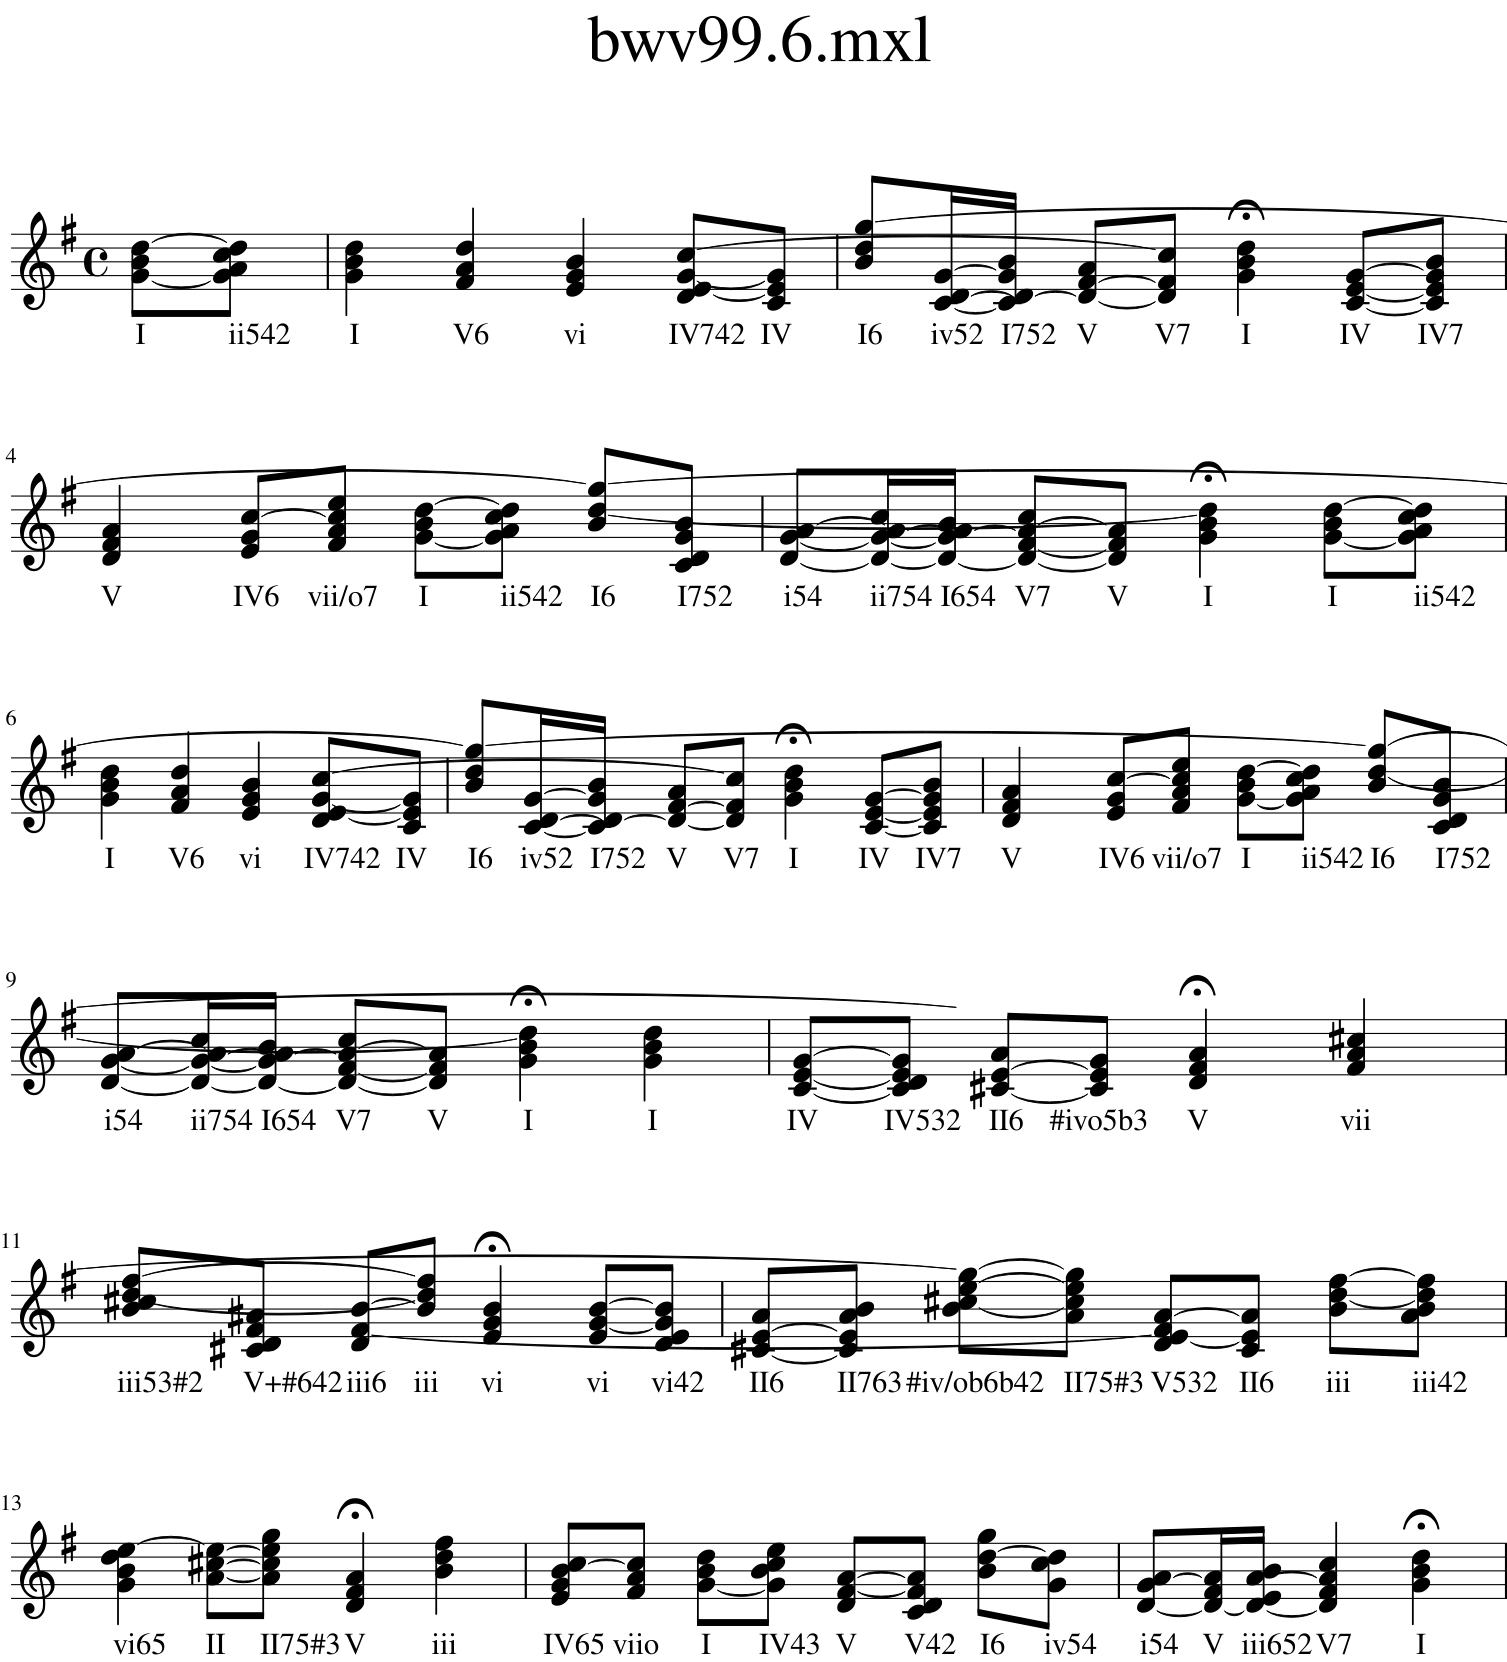

In [ ]:
aarden_key = analysis.discrete.AardenEssen(bach_chorale)
key = aarden_key.getSolution(bach_chorale)

## reduce
reduction = bach_chorale.chordify()
for i in reduction.recurse().getElementsByClass('Chord'):
  f = chord.Chord(i)
  rf = roman.romanNumeralFromChord(f, key)
  i.closedPosition(forceOctave=4, inPlace=True)
  i.addLyric(rf.figure)

reduction.show()

# ## loop over every chord.
# for i in reduction.recurse().getElementsByClass('Chord'):
#   f = chord.Chord(i)
#   rf = roman.romanNumeralFromChord(f, key)
#   print(rf.figure)
#   # print(rf.figure)
#   # or print(rf.figureAndKey)

It's not entirely clear how helpful such an annotation would be, though...

# Wednesday

Today we will: 

- Talk about projects. 
- Talk about ways in which we might examine the Roman numeral data.
- Look at the ```context``` tool in Humdrum, and write something that's somewhat equivalent in Python.
- Look at ```while``` loops.
- Look at visualizing this data.







But how often are we getting certain types of transitions?

In [98]:
chord_qualities = []
### chordify
reduction = bach_chorale.chordify()
for i in reduction.recurse().getElementsByClass('Chord'):
  chord_qualities.append(i.commonName)
  print(i.commonName)
### roman numeral analysis

### show 

major triad
quartal tetramirror
major triad
major triad
minor triad
major-second major tetrachord
major triad
major triad
quartal trichord
perfect-fourth major tetrachord
major triad
incomplete dominant-seventh chord
major triad
major triad
major seventh chord
major triad
major triad
half-diminished seventh chord
major triad
quartal tetramirror
major triad
perfect-fourth major tetrachord
quartal trichord
quartal tetramirror
major-second major tetrachord
dominant seventh chord
major triad
major triad
major triad
quartal tetramirror
major triad
major triad
minor triad
major-second major tetrachord
major triad
major triad
quartal trichord
perfect-fourth major tetrachord
major triad
incomplete dominant-seventh chord
major triad
major triad
major seventh chord
major triad
major triad
half-diminished seventh chord
major triad
quartal tetramirror
major triad
perfect-fourth major tetrachord
quartal trichord
quartal tetramirror
major-second major tetrachord
dominant seventh chord
major triad
ma

In [ ]:
import numpy as np
import pandas as pd

values, counts = np.unique(chord_qualities, return_counts=True)

df = pd.DataFrame(list(zip(values, counts)), columns= ['Chord','Counts'])

df.sort_values(by=['Counts'], ascending=False)


,Chord,Counts
6,major triad,41
10,minor triad,9
7,major-second major tetrachord,7
12,quartal tetramirror,7
2,dominant seventh chord,6
13,quartal trichord,6
5,major seventh chord,4
11,perfect-fourth major tetrachord,4
3,half-diminished seventh chord,3
9,minor seventh chord,3


In [99]:
bi_gram = []
i= 0

while(i< len(chord_qualities)-1):
    roman_numerals = f'{chord_qualities[i]} --> {chord_qualities[i+1]}'
    bi_gram.append(roman_numerals)
    i=i+1

print(bi_gram)


values, counts = np.unique(bi_gram, return_counts=True)
df = pd.DataFrame(list(zip(values, counts)), columns= ['Bigrams', 'Counts'])
df.sort_values(by=['Counts'], ascending=False)

['major triad --> quartal tetramirror', 'quartal tetramirror --> major triad', 'major triad --> major triad', 'major triad --> minor triad', 'minor triad --> major-second major tetrachord', 'major-second major tetrachord --> major triad', 'major triad --> major triad', 'major triad --> quartal trichord', 'quartal trichord --> perfect-fourth major tetrachord', 'perfect-fourth major tetrachord --> major triad', 'major triad --> incomplete dominant-seventh chord', 'incomplete dominant-seventh chord --> major triad', 'major triad --> major triad', 'major triad --> major seventh chord', 'major seventh chord --> major triad', 'major triad --> major triad', 'major triad --> half-diminished seventh chord', 'half-diminished seventh chord --> major triad', 'major triad --> quartal tetramirror', 'quartal tetramirror --> major triad', 'major triad --> perfect-fourth major tetrachord', 'perfect-fourth major tetrachord --> quartal trichord', 'quartal trichord --> quartal tetramirror', 'quartal tetra

,Bigrams,Counts
14,major triad --> major triad,13
2,dominant seventh chord --> major triad,5
18,major triad --> quartal tetramirror,5
16,major triad --> minor triad,5
22,major-second major tetrachord --> major triad,4
34,quartal tetramirror --> major triad,4
13,major triad --> major seventh chord,3
19,major triad --> quartal trichord,3
30,minor triad --> minor triad,3
8,major seventh chord --> major triad,3


## While Loops

So what was the ```while``` functionality in that last bit of code?

There are a number of steps here that might be of interest:

1. Starts a counter at 0
2. Says that while the counter is less than the length of the list - 1 (it's one less than the list so it doesn't run over the range of the list)
3. create a variable that is the chord your looking at, as well as the next chord.
4. then add one to the counter.

It will repeat this until it gets to the length of the variable (-1).


```
i= 0
while(i< len(chord_qualities)-1):
    roman_numerals = f'{chord_qualities[i]} --> {chord_qualities[i+1]}'
    bi_gram.append(roman_numerals)
    i=i+1
```

Here is a basic example of a ```while``` loop:

In [101]:
i = 1
while i < 6:
  print(i)
  i += 1

1
2
3
4
5


You can also add break statements, to exit out of the loop when needed:


In [102]:
i = 1
while i < 20:
  print(i)
  if i == 18:
    break
  i += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


And you can go the other way too...


In [103]:
count = 10
print("Can you hear me, Major Tom??")
while (count > 0):
   print(count)
   count = count - 1

print("Floating in my tin cannnnn...")

Can you hear me, Major Tom??
10
9
8
7
6
5
4
3
2
1
Floating in my tin cannnnn...


On Monday, we looked at the below code that returned the Roman numerals of a chorale (I've changed it a little bit to create an array, and not a ```print``` statement.)

Let's try to get the same type of table, but with Roman numerals. It might be worth considering a function for this. Perhaps a "make_bigram_table" function or something.

In [104]:
### can we get a Roman numeral analysis?

### get the key...
aarden_key = analysis.discrete.AardenEssen(bach_chorale)
key = aarden_key.getSolution(bach_chorale)

## reduce
reduction = bach_chorale.chordify()
rn = []
## loop over every chord.
for i in reduction.recurse().getElementsByClass('Chord'):
  f = chord.Chord(i)
  rf = roman.romanNumeralFromChord(f, key)
  print(rf.figure)
  rn.append(rf.figure)
  # print(rf.figure)
  # or print(rf.figureAndKey)

I
ii542
I
V6
vi
IV742
IV
I6
iv52
I752
V
V7
I
IV
IV7
V
IV6
vii/o7
I
ii542
I6
I752
i54
ii754
I654
V7
V
I
I
ii542
I
V6
vi
IV742
IV
I6
iv52
I752
V
V7
I
IV
IV7
V
IV6
vii/o7
I
ii542
I6
I752
i54
ii754
I654
V7
V
I
I
IV
IV532
II6
#ivo5b3
V
vii
iii53#2
V+#642
iii6
iii
vi
vi
vi42
II6
II763
#iv/ob6b42
II75#3
V532
II6
iii
iii42
vi65
II
II75#3
V
iii
IV65
viio
I
IV43
V
V42
I6
iv54
i54
V
iii652
V7
I


In [105]:
def make_bigram_table(dataset, viz=False):
  ### create an empty variable
  bi_gram = []
  ###start a counter for my while loop.
  i= 0
  ###here's my while loop.
  while(i< len(dataset)-1):
    roman_numerals = f'{dataset[i]} --> {dataset[i+1]}'
    bi_gram.append(roman_numerals)
    i=i+1
  
  """
  you might remember this code from last week. It creates a dataframe.
  The one thing that's different is that now there's a variable for the max rows, 
  so it can change depending on however long the dataset is.
  """
  pd.set_option('max_rows', len(dataset))
  values, counts = np.unique(bi_gram, return_counts=True)
  df = pd.DataFrame(list(zip(values, counts)), columns= ['Bigrams', 'Counts'])
  
  """
  here, I've written in a little argument for how to display the data. The default
  for the viz argument is false, so it will print out a table by default.

  If viz is flipped to True, however, it will give a little histogram.

  Here, I'm using Pandas groupby, which can actually do the summing function 
  we called before. If you have many columns in your data, it's usually best to just work 
  here within the pandas toolkit.
  
  """
 
  if viz == False:
    display(df.sort_values(by=['Counts'], ascending=False))
  else:
    df = df.groupby('Bigrams')['Counts'].sum()
    df.sort_values()[-15:].plot(kind='bar')


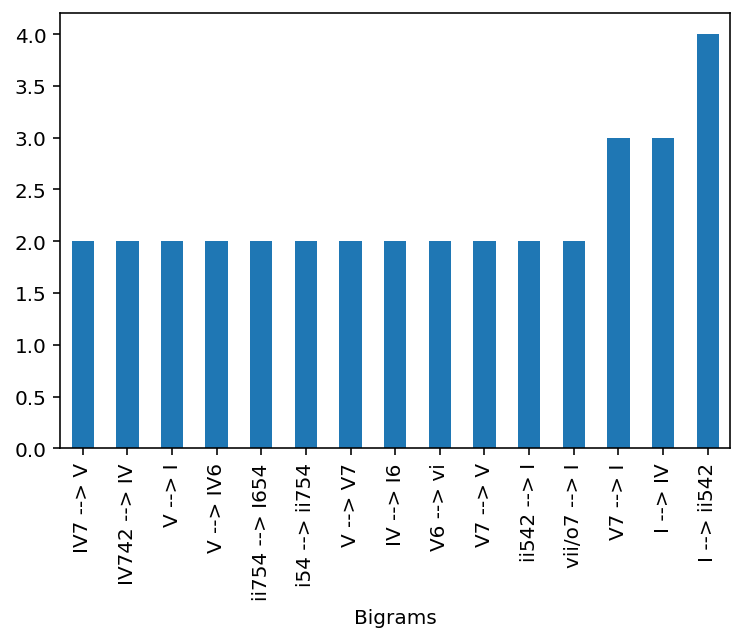

In [107]:
make_bigram_table(rn, viz=True)

## Exercise:

What if I just want roman numerals from downbeats? How would I find that?

Recall that we used this ```beatStrength``` function a couple of weeks ago...
```
for n in littleMelody.flat.notes:
    if n.beatStrength == 1:
      n.show()
```

In [132]:
### our code here...
rn =[]
def downbeat_finder(file):
  bach_chorale = converter.parse(file)
  bach_chorale = bach_chorale.chordify()
  aarden_key = analysis.discrete.AardenEssen(bach_chorale)
  key = aarden_key.getSolution(bach_chorale)
  rn = []
  for n in bach_chorale.flat.notes:
    if n.beatStrength == 1:
        rf = roman.romanNumeralFromChord(n, key)
        print(rf.figure)
        rn.append(rf.figure)
  # # print(rf.figure)
  # # or print(rf.figureAndKey)


In [133]:
for i in file_list:
  downbeat_finder(i)

I
II65
I
I
V6
II
vi65
III65
ii42
I
vi
I532
I
I
I
vi
ii
I
I
vi42
I6
ii
I
I
vi
I
vi65
IV
v6
ii
ii6
ii54
I42
IV
I
ii65
I
IV
V7
I
IV
I
I
II
I
IV
II
V
IV
vi
I
I
I
iii
ii
I
IV6
I64
V
II6
V
I6
v7b3
vi
I64
I
IV
V
vi7
V
V
I
ii542
I
I
V
vi
ii7
I
I
V7
V
iii
V
IV
VI
ii
i54
I
#vo6
I
ii65
bVI
bVII
i
i
III
viio#63
V
i
IV6
III6
iv6
iv54
I
II
v
i
ii/o65
i
i
i
v64
bVII6
i
V6
I
V6
I
ii542
ii6
V
V6
V
I
V
IV
ii
V
I
i
IV6
i
viio#63
V
III6
i
iv
bVII
ii/o42
i6
i64
III+6
V6
bVI
i
i
V6
bVI
i
II6
bVII6
i54
i
V6
iio6
I
bVII
ii7
ii65
iiio6
IV
V65
iv54
I6
IV6
I
V
I
vi
I6
I
V6
V
ii
I
V7
V
vii7
V
IV532
I
ii532
i54
vi
VI65
iii
ii65
I
I
I6
vi6
V
I6
I
I64
I
I
I6b5
I64
I
I
IV
IV6
V
I
IV
IV6
I
IV
I
ii542
ii6
i54
I
vi
IV
ii65
I
I6
V
vi7
V
vi
viio6
II7#3
V
IV65
II65
I6
I
IV
IV65
I6
vi7
vi
V
vi
ii
I6
vi7
I6
I64
i
ii/o65
i
I6
i6
i
i
IV65
III
#ivo6b5b3
V
IV6
I
i
II6
V
IV6
i
i
bVI6
III
III
iv65
III
bVI
i6
ii/o65
vi
iii
I
I
vi
I
V6
V
I
V42
III#42
vi
ii65
I
I6
I
I
V6
I732
vi
ii65
I
vi532
III
IV
V532
vi532
V6
I
ii65
I6
I
II
v
i
ii

KeyboardInterrupt: ignored

In [134]:
make_bigram_table(rn)

,Bigrams,Counts
